## Question 1: Funding quality and measure per year correlation with ELA and math performance

Last updated on 3/26/20


**Hypothesis**: If art programs affect student performance, then schools with stronger indicators of funding will have significantly different math and ela state test scores than schools with weaker indicators of funding.

**Null hypothesis**: If art programs do not affect student performance, then schools with stronger indicators of funding will not have significantly different math and ELA state test scores than schools with weaker indicators of funding.

**Indicators of funding** will be: (a) number of funding sources, (b) self-report of increase or decrease in funding, and (c) self-report of adequate or inadequate funding). 

**Math/ELA performance** will be measured by pass rate (proportion of students earning a score of 3 or 4).

### Data

Annual Arts Education Survey: https://data.cityofnewyork.us/browse/select_dataset?Dataset-Information_Agency=Department+of+Education+%28DOE%29&nofederate=true&suppressed_facets[]=domain&utf8=✓&sortBy=relevance&q=Arts%20Data%20Survey 

New York State Test Results: https://infohub.nyced.org/reports/academics/test-results 

In [7]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import json

## Dataset 1: Arts Data

In [8]:
# arts_2014_2015_file = "2014-2015_Arts_Survey_Data.csv"
# arts_2015_2016_file = "2015-2016_Arts_Survey_Data.csv"
arts_2016_2017_file = "2016-2017_Arts_Survey_Data.csv"
arts_2017_2018_file = "2017-2018_Arts_Survey_Data.csv"
arts_2018_2019_file = "2018-2019_Arts_Survey_Data.csv"

# arts_2014_2015 = pd.read_csv(arts_2014_2015_file, low_memory=False)
# arts_2015_2016 = pd.read_csv(arts_2015_2016_file, low_memory=False)
arts_2016_2017 = pd.read_csv(arts_2016_2017_file, low_memory=False)
arts_2017_2018 = pd.read_csv(arts_2017_2018_file, low_memory=False)
arts_2018_2019 = pd.read_csv(arts_2018_2019_file, low_memory=False)


arts_2016_2017['Year'] = 2017
arts_2017_2018['Year'] = 2018
arts_2018_2019['Year'] = 2019

FileNotFoundError: [Errno 2] File b'2016-2017_Arts_Survey_Data.csv' does not exist: b'2016-2017_Arts_Survey_Data.csv'

## Data  Dictionaries: 

### 2016-2017

**Q34:** Did your school receive the following funding sources (non-DOE) to support arts education in this school year (*check all that apply*)?

(Yes/No radio buttons)

**Funding Sources**
* Cultural organizations
* Education association
* Federal, state, or city grants
* Local business or corporation
* Private foundation
* PTA/PA
* State, county, local arts councils

---

**Q35:** Funding for the arts is generally:

* Abundant
* Sufficient
* Insufficient
* N/A

---

**Q36:** 

* Increased
* Decreased
* Remained the same

### 2017-2018

**Q36:** Did your school receive the following funding sources (non-DOE) to support arts education in this school year (*check all that apply*)?

(Yes/No radio buttons)

**Funding Sources**
* Cultural organizations
* Education association
* Federal, state, or city grants
* Local business or corporation
* Private foundation
* PTA/PA
* State, county, local arts councils

---

**Q37:** Funding for the arts is generally:

* Abundant
* Sufficient
* Insufficient
* N/A

---

**Q38:** Funding over the past three years has:

* Increased
* Decreased
* Remained the same

### 2018-2019

**Q32:** Did your school receive the following funding sources (non-DOE) to support arts education in this school year (*check all that apply*)?

(Yes/No radio buttons)

**Funding Sources**
* Cultural organizations
* Education association
* Federal, state, or city grants
* Local business or corporation
* Private foundation
* PTA/PA
* State, county, local arts councils

---

**Q33:** Funding for the arts is generally:

* Abundant
* Sufficient
* Insufficient
* N/A

---

**Q34:** Funding over the past three years has:

* Increased
* Decreased
* Remained the same

## Clean/Explore Dataset 1

In [3]:
#print(str(arts_2016_2017.columns))

# Q34, Q35, Q36
# # Note: for Q34, quetions with the 'C1' and 'C2' suffixes are redundant because they are inverses of each other
# funding_2016_2017 = arts_2016_2017[['Q0_DBN', 
#                                     'Q34_R1_C1', 'Q34_R1_C2', 'Q34_R2_C1', 'Q34_R2_C2',
#                                     'Q34_R3_C1', 'Q34_R3_C2', 'Q34_R4_C1', 'Q34_R4_C2', 
#                                     'Q34_R5_C1','Q34_R5_C2', 'Q34_R6_C1', 'Q34_R6_C2',
#                                     'Q34_R7_C1', 'Q34_R7_C2',
#                                     'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 
#                                     'Q36_1', 'Q36_2', 'Q36_3']]


# Q34, Q35, Q36
funding_2016_2017 = arts_2016_2017[['Q0_DBN',
                                    'Year',
                                    'Q34_R1_C1', 
                                    'Q34_R2_C1',
                                    'Q34_R3_C1',
                                    'Q34_R4_C1',
                                    'Q34_R5_C1',
                                    'Q34_R6_C1',
                                    'Q34_R7_C1', 
                                    'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 
                                    'Q36_1', 'Q36_2', 'Q36_3']]

funding_2016_2017.head()

NameError: name 'arts_2016_2017' is not defined

In [4]:
# print(str(arts_2017_2018.columns))

# # Q36, Q37, Q38
# # Note: for Q36, quetions with the 'C1' and 'C2' suffixes are redundant because they are  inverses of each other
# funding_2017_2018 = arts_2017_2018[['Q0_DBN', 
#                                    'Q36_R1_C1','Q36_R1_C2',
#                                     'Q36_R2_C1', 'Q36_R2_C2', 
#                                     'Q36_R3_C1', 'Q36_R3_C2', 
#                                     'Q36_R4_C1', 'Q36_R4_C2',
#                                     'Q36_R5_C1', 'Q36_R5_C2', 
#                                     'Q36_R6_C1', 'Q36_R6_C2', 
#                                     'Q36_R7_C1','Q36_R7_C2', 
#                                     'Q37_1', 'Q37_2', 
#                                     'Q37_3', 'Q37_4', 
#                                     'Q38_1', 'Q38_2','Q38_3']]


# # Q36, Q37, Q38
funding_2017_2018 = arts_2017_2018[['Q0_DBN',
                                    'Year',
                                   'Q36_R1_C1',
                                    'Q36_R2_C1', 
                                    'Q36_R3_C1',
                                    'Q36_R4_C1',
                                    'Q36_R5_C1',
                                    'Q36_R6_C1',
                                    'Q36_R7_C1',
                                    'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 
                                    'Q38_1', 'Q38_2','Q38_3']]

funding_2017_2018.head()

NameError: name 'arts_2017_2018' is not defined

In [5]:
#print(str(arts_2018_2019.columns))

# # Q32, Q33, Q34
# # Note: for Q32, quetions with the 'C1' and 'C2' suffixes are redundant because they are  inverses of each other
# funding_2018_2019 = arts_2018_2019[['Q0_DBN', 
#                                     ' Q32_R1_C1', ' Q32_R1_C2', ' Q32_R2_C1',
#                                     ' Q32_R2_C2', ' Q32_R3_C1', ' Q32_R3_C2', 
#                                     ' Q32_R4_C1', ' Q32_R4_C2',' Q32_R5_C1', 
#                                     ' Q32_R5_C2', ' Q32_R6_C1', ' Q32_R6_C2', 
#                                     ' Q32_R7_C1',' Q32_R7_C2', 
#                                     'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 
#                                     'Q34_1', 'Q34_2','Q34_3']]


# Q32, Q33, Q34
funding_2018_2019 = arts_2018_2019[['Q0_DBN',
                                    'Year',
                                    ' Q32_R1_C1',
                                    ' Q32_R2_C1',
                                    ' Q32_R3_C1', 
                                    ' Q32_R4_C1',
                                    ' Q32_R5_C1', 
                                    ' Q32_R6_C1',
                                    ' Q32_R7_C1', 
                                    'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 
                                    'Q34_1', 'Q34_2','Q34_3']]



funding_2018_2019.head()

NameError: name 'arts_2018_2019' is not defined

In [6]:
# Rename columns

funding_2016_2017 = funding_2016_2017.rename(columns={'Q0_DBN': 'DBN',
                                                      'Year': 'year',
                                    'Q34_R1_C1': 'Q1_cultural_org',
                                    'Q34_R2_C1': 'Q1_education_assoc',
                                    'Q34_R3_C1': 'Q1_grants', 
                                    'Q34_R4_C1': 'Q1_local_business',
                                    'Q34_R5_C1': 'Q1_private_foundation', 
                                    'Q34_R6_C1': 'Q1_PTA_PA',
                                    'Q34_R7_C1': 'Q1_arts_council', 
                                    'Q35_1': 'Q2_abundant', 'Q35_2': 'Q2_sufficient', 
                                    'Q35_3': 'Q2_insufficient', 'Q35_4': 'Q2_na', 
                                    'Q36_1': 'Q3_increased', 'Q36_2': 'Q3_decreased','Q36_3':'Q3_same'})
funding_2016_2017.head()

NameError: name 'funding_2016_2017' is not defined

In [135]:
# Rename columns

funding_2017_2018 = funding_2017_2018.rename(columns={'Q0_DBN': 'DBN',
                                                      'Year': 'year',
                                    'Q36_R1_C1': 'Q1_cultural_org',
                                    'Q36_R2_C1': 'Q1_education_assoc',
                                    'Q36_R3_C1': 'Q1_grants', 
                                    'Q36_R4_C1': 'Q1_local_business',
                                    'Q36_R5_C1': 'Q1_private_foundation', 
                                    'Q36_R6_C1': 'Q1_PTA_PA',
                                    'Q36_R7_C1': 'Q1_arts_council', 
                                    'Q37_1': 'Q2_abundant', 'Q37_2': 'Q2_sufficient', 
                                    'Q37_3': 'Q2_insufficient', 'Q37_4': 'Q2_na', 
                                    'Q38_1': 'Q3_increased', 'Q38_2': 'Q3_decreased','Q38_3':'Q3_same'})
funding_2016_2017.head()

,DBN,year,Q1_cultural_org,Q1_education_assoc,Q1_grants,Q1_local_business,Q1_private_foundation,Q1_PTA_PA,Q1_arts_council,Q2_abundant,Q2_sufficient,Q2_insufficient,Q2_na,Q3_increased,Q3_decreased,Q3_same
0,01M015,2017,1,0,1,1,1,0,1,0,0,1,0,0,0,1
1,01M019,2017,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2017,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,01M034,2017,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M515,2017,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [136]:
# Rename columns

funding_2018_2019 = funding_2018_2019.rename(columns={'Q0_DBN': 'DBN',
                                                      'Year': 'year',
                                    ' Q32_R1_C1': 'Q1_cultural_org',
                                    ' Q32_R2_C1': 'Q1_education_assoc',
                                    ' Q32_R3_C1': 'Q1_grants', 
                                    ' Q32_R4_C1': 'Q1_local_business',
                                    ' Q32_R5_C1': 'Q1_private_foundation', 
                                    ' Q32_R6_C1': 'Q1_PTA_PA',
                                    ' Q32_R7_C1': 'Q1_arts_council', 
                                    'Q33_1': 'Q2_abundant', 'Q33_2': 'Q2_sufficient', 
                                    'Q33_3': 'Q2_insufficient', 'Q33_4': 'Q2_na', 
                                    'Q34_1': 'Q3_increased', 'Q34_2': 'Q3_decreased','Q34_3':'Q3_same'})
funding_2018_2019.head()

,DBN,year,Q1_cultural_org,Q1_education_assoc,Q1_grants,Q1_local_business,Q1_private_foundation,Q1_PTA_PA,Q1_arts_council,Q2_abundant,Q2_sufficient,Q2_insufficient,Q2_na,Q3_increased,Q3_decreased,Q3_same
0,01M015,2019,1,0,0,1,1,0,0,0,0,1,0,0,1,0
1,01M019,2019,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2019,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,01M034,2019,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M063,2019,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [137]:
# Merge dataframes to continue the cleaning process

funding_df = funding_2016_2017.append([funding_2017_2018, funding_2018_2019])

In [138]:
# count number of funding sources for Q1

funding_df['Q1_funding_sources'] = funding_df['Q1_cultural_org'] + funding_df['Q1_education_assoc'] + funding_df['Q1_grants'] + funding_df['Q1_local_business'] + funding_df['Q1_private_foundation'] + funding_df['Q1_PTA_PA'] + funding_df['Q1_arts_council']

# set labels for Q2
q2_cond1 = (funding_df['Q2_abundant'] == 1)
funding_df.loc[q2_cond1, 'Q2_label'] = 'abundant'

q2_cond2 = (funding_df['Q2_sufficient'] == 1)
funding_df.loc[q2_cond2, 'Q2_label'] = 'sufficient'

q2_cond3 = (funding_df['Q2_insufficient'] == 1)
funding_df.loc[q2_cond3, 'Q2_label'] = 'insufficient'

q2_cond4 = (funding_df['Q2_na'] == 1)
funding_df.loc[q2_cond4, 'Q2_label'] = 'na'


# set labels for Q3
q3_cond1 = (funding_df['Q3_increased'] == 1)
funding_df.loc[q3_cond1, 'Q3_label'] = 'increased'

q3_cond2 = (funding_df['Q3_decreased'] == 1)
funding_df.loc[q3_cond2, 'Q3_label'] = 'decreased'

q3_cond3 = (funding_df['Q3_same'] == 1)
funding_df.loc[q3_cond3, 'Q3_label'] = 'same'

funding_df = funding_df[['DBN', 'year', 'Q1_funding_sources', 'Q2_label', 'Q3_label',
        'Q1_cultural_org', 'Q1_education_assoc', 'Q1_grants',
       'Q1_local_business', 'Q1_private_foundation', 'Q1_PTA_PA',
       'Q1_arts_council', 'Q2_abundant', 'Q2_sufficient', 'Q2_insufficient',
       'Q2_na', 'Q3_increased', 'Q3_decreased', 'Q3_same']]

# create smaller df with columns of interest

funding_analysis_df = funding_df[['DBN', 'year', 'Q1_funding_sources', 'Q2_label', 'Q3_label']]

funding_analysis_df.head()

,DBN,year,Q1_funding_sources,Q2_label,Q3_label
0,01M015,2017,5,insufficient,same
1,01M019,2017,0,insufficient,same
2,01M020,2017,2,insufficient,decreased
3,01M034,2017,0,insufficient,decreased
4,01M515,2017,2,insufficient,decreased


### Explore Data

In [139]:
# Note: we may want to use dummy coding when doing analyses like correlation and regression

# Q1: Type of funding sources by DBN
# Q1: Number of funding sources reported by DBN

funding_analysis_df.sort_values(by='Q1_funding_sources').head(20)

# Q2: Funding rating (abundant, sufficient, insufficient, N/A)

funding_analysis_df.groupby(['Q2_label', 'year']).mean().reset_index()

#Q3: Increase/decrease/no change in funding

funding_analysis_df.groupby(['Q3_label', 'year']).mean().reset_index()


# Group by all three questions to create "types"
funding_analysis_df.groupby(['Q2_label', 'Q3_label', 'year']).mean().reset_index()

,Q2_label,Q3_label,year,Q1_funding_sources
0,abundant,decreased,2017,2.000000
1,abundant,increased,2017,2.266667
2,abundant,increased,2018,2.052632
3,abundant,increased,2019,2.285714
4,abundant,same,2017,1.818182
5,abundant,same,2018,1.444444
6,abundant,same,2019,1.235294
7,insufficient,decreased,2017,1.428994
8,insufficient,decreased,2018,1.481481
9,insufficient,decreased,2019,1.464819


In [140]:
# funding_analysis_df.groupby(['DBN', 'year', 'Q2_label', 'Q3_label']).mean()

## Dataset 2: ELA and Math Data

### API

In [141]:
# # define API URLs
# math_url = 'https://data.cityofnewyork.us/resource/m27t-ht3h.json'
# ela_url = 'https://data.cityofnewyork.us/resource/qkpp-pbi8.json'

In [142]:
# # retrieve 2013-2018 School Math Results
# math_results = requests.get(math_url).json()

# math_df = pd.DataFrame(math_results)
# math_df.head()
# print(f'Math Results Rows: {len(math_df)}')
# print(list(math_df.columns))

In [143]:
# # retrieve 2013-2018 School ELA Results
# ela_results = requests.get(ela_url).json()

# ela_df = pd.DataFrame(ela_results)
# ela_df.head()
# print(f'ELA Results Rows: {len(ela_df)}')
# print(list(ela_df.columns))
# print(ela_df['year'].unique())

In [63]:
# can use .csvs because API is not up-to-date
ela_df = pd.read_csv('2013-2019_school_ela_results.csv', low_memory=False)
math_df = pd.read_csv('2013-2019_school_math_results.csv', low_memory=False)


#rename the columns to match the API data
math_df = math_df.rename(columns = {
                'Unnamed: 0': 'Unnamed',
                'School Name':'school_name', 
                'Grade': 'grade', 
                'Year': 'year', 
                'Category': 'category',
                'Number Tested': 'number_tested', 
                'Mean Scale Score': 'mean_scale_score', 
                '# Level 1': 'level_1', 
                '% Level 1': 'level_1_1',
                '# Level 2': 'level_2',
                '% Level 2': 'level_2_1',
                '# Level 3': 'level_3',
                '% Level 3': 'level_3_1',
                '# Level 4': 'level_4',
                '% Level 4': 'level_4_1',
                '# Level 3+4':'level_3_4',
                '% Level 3+4':'level_3_4_1'})

ela_df = ela_df.rename(columns = {
                'Unnamed: 0': 'Unnamed',
                'School Name':'school_name', 
                'Grade': 'grade', 
                'Year': 'year', 
                'Category': 'category',
                'Number Tested': 'number_tested', 
                'Mean Scale Score': 'mean_scale_score', 
                '# Level 1': 'level_1', 
                '% Level 1': 'level_1_1',
                '# Level 2': 'level_2',
                '% Level 2': 'level_2_1',
                '# Level 3': 'level_3',
                '% Level 3': 'level_3_1',
                '# Level 4': 'level_4',
                '% Level 4': 'level_4_1',
                '# Level 3+4':'level_3_4',
                '% Level 3+4':'level_3_4_1'})

## Clean/Explore Dataset 2

In [64]:
# Get rid of 'All Grades' rows as they aggreate the other rows
math_df = math_df[math_df['grade'] == 'All Grades']
ela_df = ela_df[ela_df['grade'] == 'All Grades']

# convert columns to numeric
cols = ['number_tested', 'mean_scale_score', 'level_1', 'level_1_1', 'level_2', 'level_2_1', 'level_3', 'level_3_1', 'level_4', 'level_4_1', 'level_3_4', 'level_3_4_1']
math_df[cols] = math_df[cols].apply(pd.to_numeric, errors='coerce')

# convert columns to numeric
cols = ['number_tested', 'mean_scale_score', 'level_1', 'level_1_1', 'level_2', 'level_2_1', 'level_3', 'level_3_1', 'level_4', 'level_4_1', 'level_3_4', 'level_3_4_1']
ela_df[cols] = ela_df[cols].apply(pd.to_numeric, errors='coerce')

In [65]:
# ela_funding = pd.merge(funding_analysis_df, ela_df, on = 'DBN')
# math_funding = pd.merge(funding_analysis_df, math_df, on = 'DBN')

ela_funding = funding_analysis_df.merge(ela_df, how='inner', left_on=["DBN", "year"], right_on=["DBN", "year"])
math_funding = funding_analysis_df.merge(math_df, how='inner', left_on=["DBN", "year"], right_on=["DBN", "year"])

# need to drop the NAs in order to run the tests
ela_funding = ela_funding.dropna()
math_funding = math_funding.dropna()

ela_funding.to_csv('ela_funding.csv')
math_funding.to_csv('math_funding.csv')

In [66]:
# grab pass rate data 
ela_pass_rate_df = ela_funding[['DBN', 'year', 'Q1_funding_sources', 'Q2_label', 'Q3_label',
       'school_name', 'grade', 'category', 'number_tested','level_3_4',
       'level_3_4_1']]
math_pass_rate_df = math_funding[['DBN', 'year', 'Q1_funding_sources', 'Q2_label', 'Q3_label',
       'school_name', 'grade','category', 'number_tested','level_3_4',
       'level_3_4_1']]

In [67]:
ela_pass_rate_df.to_csv('ela_pass_rate_df.csv')
math_pass_rate_df.to_csv('math_pass_rate_df.csv')

## Analysis

**Note:** I performed all calculations for each year separately and got similar results, so I will collapse over the three years.

### Descriptives

In [68]:
# number of schools in both datasets
ela_sample_size = len(ela_pass_rate_df['DBN'].unique())
math_sample_size = len(math_pass_rate_df['DBN'].unique())

# # average overall pass rate
ela_pass_rate = ela_pass_rate_df['level_3_4_1'].mean()
math_pass_rate = math_pass_rate_df['level_3_4_1'].mean()

In [69]:
# Data Summary table:
funding_summary = pd.DataFrame({
                                'Total Schools in Sample': [ela_sample_size],  # same # in math and ELA sample
                                'ELA Pass Rate': [round(ela_pass_rate, 2)],
                                'Math Pass Rate': [round(math_pass_rate, 2)]})
funding_summary

,Total Schools in Sample,ELA Pass Rate,Math Pass Rate
0,1114,44.12,41.55


The r-squared value is: 0.85


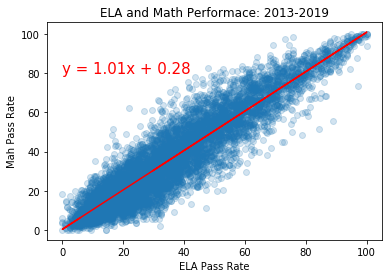

In [100]:
# Association between math and ELA scores

ela_math_scores = ela_df.merge(math_df, how='inner', left_on=["DBN", "year"], right_on=["DBN", "year"])
ela_math_scores = ela_math_scores.dropna()

regression = stats.linregress(ela_math_scores['level_3_4_1_x'], ela_math_scores['level_3_4_1_y'])
slope = regression[0]
intercept = regression[1]
x = ela_math_scores['level_3_4_1_x']
y = slope * x + intercept
rsq_value = round(regression[2]**2,2)

plt.scatter(ela_math_scores['level_3_4_1_x'], ela_math_scores['level_3_4_1_y'], alpha = .2)
plt.title('ELA and Math Performace: 2013-2019')
plt.xlabel('ELA Pass Rate')
plt.ylabel('Mah Pass Rate')
plt.plot(x, y, color = 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0,80), fontsize = 15, color = "r")
print(f"The r-squared value is: {rsq_value}")
plt.show()

In [99]:
# How did schools report funding as a whole?

ela_pass_rate_df.pivot_table(values = 'DBN', 
                             index = 'Q2_label', 
                             columns = 'Q3_label', 
                             aggfunc = lambda x: len(x.unique()))  # don't want count of the rows, want unique schools

Q3_label,decreased,increased,same
Q2_label,,,
abundant,1,17,19
insufficient,539,194,695
na,5,2,30
sufficient,70,169,314


### Statistical Tests: Sufficient Funding

We compared the ELA state test scores of schools who reported abundant (*N* = 32, *M* = 56), sufficient (*N* = 445, *M* = 46), insufficient (*N* = 961, *M* = 43), and N/A (*N* = 36, *M* = 56) funding for the arts. A one-way ANOVA revealed that schools with more arts  funding performed significantly better on the ELA state test than with poor funding, *F* = 12.96, *p* < .001. These results also held for the math state test, *F* = 12.78, *p* < .001. 

In [24]:
# ELA

# Is funding sufficient?

# Measure 2: Sufficient/Insuffcient Funding
ela_funding_abund = ela_pass_rate_df[ela_pass_rate_df['Q2_label'] == 'abundant']
ela_funding_suff = ela_pass_rate_df[ela_pass_rate_df['Q2_label'] == 'sufficient']
ela_funding_insuff = ela_pass_rate_df[ela_pass_rate_df['Q2_label'] == 'insufficient']
ela_funding_na = ela_pass_rate_df[ela_pass_rate_df['Q2_label'] == 'na']

#mean of each group
ela_funding_abund_mean = np.mean(ela_funding_abund['level_3_4_1'])
ela_funding_suff_mean = np.mean(ela_funding_suff['level_3_4_1'])
ela_funding_insuff_mean = np.mean(ela_funding_insuff['level_3_4_1'])
ela_funding_na_mean = np.mean(ela_funding_na['level_3_4_1'])


# sample size of each group
ela_funding_abund_samplesize = len(ela_funding_abund['DBN'].unique())
ela_funding_suff_samplesize = len(ela_funding_suff['DBN'].unique())
ela_funding_insuff_samplesize = len(ela_funding_insuff['DBN'].unique())
ela_funding_na_samplesize = len(ela_funding_na['DBN'].unique())

# ANOVA
stats.f_oneway(ela_funding_abund['level_3_4_1'], 
               ela_funding_suff['level_3_4_1'], 
               ela_funding_insuff['level_3_4_1'],
               ela_funding_na['level_3_4_1'])

F_onewayResult(statistic=12.962491319689265, pvalue=2.0564796607598634e-08)

In [25]:
# Math

# Is funding sufficient?

# Measure 2: Sufficient/Insuffcient Funding
math_funding_abund = math_pass_rate_df[math_pass_rate_df['Q2_label'] == 'abundant']
math_funding_suff = math_pass_rate_df[math_pass_rate_df['Q2_label'] == 'sufficient']
math_funding_insuff = math_pass_rate_df[math_pass_rate_df['Q2_label'] == 'insufficient']
math_funding_na = math_pass_rate_df[math_pass_rate_df['Q2_label'] == 'na']

#mean of each group
math_funding_abund_mean = np.mean(math_funding_abund['level_3_4_1'])
math_funding_suff_mean = np.mean(math_funding_suff['level_3_4_1'])
math_funding_insuff_mean = np.mean(math_funding_insuff['level_3_4_1'])
math_funding_na_mean = np.mean(math_funding_na['level_3_4_1'])


# sample size of each group
math_funding_abund_samplesize = len(math_funding_abund['DBN'].unique())
math_funding_suff_samplesize = len(math_funding_suff['DBN'].unique())
math_funding_insuff_samplesize = len(math_funding_insuff['DBN'].unique())
math_funding_na_samplesize = len(math_funding_na['DBN'].unique())

# ANOVA
stats.f_oneway(math_funding_abund['level_3_4_1'], 
               math_funding_suff['level_3_4_1'], 
               math_funding_insuff['level_3_4_1'],
               math_funding_na['level_3_4_1'])

F_onewayResult(statistic=12.7578805828191, pvalue=2.7640781009872767e-08)

In [26]:
# Look at means and sample sizes (math and ELA are similar)

print(ela_funding_abund_mean)
print(ela_funding_suff_mean)
print(ela_funding_insuff_mean)
print(ela_funding_na_mean)
print(ela_funding_abund_samplesize)   # number of schools, not number of observations
print(ela_funding_suff_samplesize)
print(ela_funding_insuff_samplesize)
print(ela_funding_na_samplesize)

# count of data points
ela_pass_rate_df['Q2_label'].value_counts()   # schools gave data over multiple years

56.73196928346154
46.36545977584798
43.21025077370429
37.39401049809524
32
445
961
36


insufficient    2266
sufficient       750
abundant          52
na                42
Name: Q2_label, dtype: int64

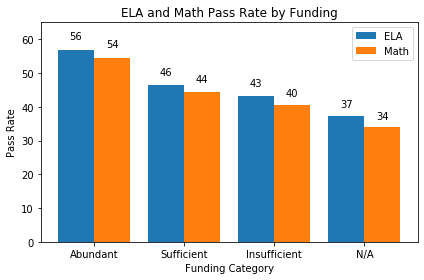

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot Math and ELA 

labels = ['Abundant', 'Sufficient', 'Insufficient', 'N/A']
ela_means = [ela_funding_abund_mean, 
            ela_funding_suff_mean, 
            ela_funding_insuff_mean,
            ela_funding_na_mean]
math_means = [math_funding_abund_mean, 
              math_funding_suff_mean, 
              math_funding_insuff_mean,
              math_funding_na_mean]

x = np.arange(len(labels))  # the label locations
width = .4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, ela_means, width, label='ELA')
rects2 = ax.bar(x+width/2, math_means, width, label='Math')

ax.set_xlabel('Funding Category')
ax.set_ylabel('Pass Rate')
ax.set_title('ELA and Math Pass Rate by Funding')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 65)
fig.tight_layout()

# label the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

plt.savefig('funding_category.png')

### Statistical Tests: Increase/decrease in Funding

We compared the ELA state test scores of schools who reported an increase (*N* = 344, *M* = 42.92), decrease (*N* = 590, *M* = 42.98), or no change (*N* = 901, *M* = 45.01) in funding for the arts. A one-way ANOVA revealed that schools with no change in funding performed significantly better on the ELA state test than those whose funding fluctuated, *F* = 4.20, *p* = .02. These results were not statistically signficant for math (*F* = 2.97, *p* = .051) but we do see the same trend.

In [28]:
# ELA

# Measure 3: Funding increase/decrese from prevous school year

# Measure 3: Sufficient/Insuffcient Funding
ela_funding_incr = ela_pass_rate_df[ela_pass_rate_df['Q3_label'] == 'increased']
ela_funding_decr = ela_pass_rate_df[ela_pass_rate_df['Q3_label'] == 'decreased']
ela_funding_same = ela_pass_rate_df[ela_pass_rate_df['Q3_label'] == 'same']

#mean of each group
ela_funding_incr_mean = np.mean(ela_funding_incr['level_3_4_1'])
ela_funding_decr_mean = np.mean(ela_funding_decr['level_3_4_1'])
ela_funding_same_mean = np.mean(ela_funding_same['level_3_4_1'])

# sample size of each group
ela_funding_incr_samplesize = len(ela_funding_incr['DBN'].unique())
ela_funding_decr_samplesize = len(ela_funding_decr['DBN'].unique())
ela_funding_same_samplesize = len(ela_funding_same['DBN'].unique())

# ANOVA
stats.f_oneway(ela_funding_incr['level_3_4_1'], 
               ela_funding_decr['level_3_4_1'], 
               ela_funding_same['level_3_4_1']
              )

F_onewayResult(statistic=4.198227784965224, pvalue=0.015107480322003562)

In [93]:
# Math

# Measure 3: Funding increase/decrese from prevous school year

# Measure 3: Sufficient/Insuffcient Funding
math_funding_incr = math_pass_rate_df[math_pass_rate_df['Q3_label'] == 'increased']
math_funding_decr = math_pass_rate_df[math_pass_rate_df['Q3_label'] == 'decreased']
math_funding_same = math_pass_rate_df[math_pass_rate_df['Q3_label'] == 'same']

#mean of each group
math_funding_incr_mean = np.mean(math_funding_incr['level_3_4_1'])
math_funding_decr_mean = np.mean(math_funding_decr['level_3_4_1'])
math_funding_same_mean = np.mean(math_funding_same['level_3_4_1'])

# sample size of each group
math_funding_incr_samplesize = len(math_funding_incr['DBN'].unique())
math_funding_decr_samplesize = len(math_funding_decr['DBN'].unique())
math_funding_same_samplesize = len(math_funding_same['DBN'].unique())

# ANOVA
stats.f_oneway(math_funding_incr['level_3_4_1'], 
               math_funding_decr['level_3_4_1'], 
               math_funding_same['level_3_4_1'])

F_onewayResult(statistic=2.9692813665661797, pvalue=0.05148594615208013)

In [109]:
# regardless of how I divide it, there is a statistically significant difference between 
# schools with abundant/sufficient funding as compared to those with poor funding 
# (either including or exclusing those who reported N/A for that question)

print(ela_funding_incr_mean)
print(ela_funding_same_mean)
print(ela_funding_decr_mean)
print(ela_funding_incr_samplesize)  # number of schools, not number of observations
print(ela_funding_same_samplesize)
print(ela_funding_decr_samplesize)

# count of data points
ela_pass_rate_df['Q3_label'].value_counts()

print(math_funding_incr_mean)
print(math_funding_same_mean)
print(math_funding_decr_mean)
print(math_funding_incr_samplesize)  # number of schools, not number of observations
print(math_funding_same_samplesize)
print(math_funding_decr_samplesize)

42.92181562583264
45.07773273911363
42.98282654250959
344
901
590
40.18648725828449
42.459978154817705
40.59532425470622
343
901
590


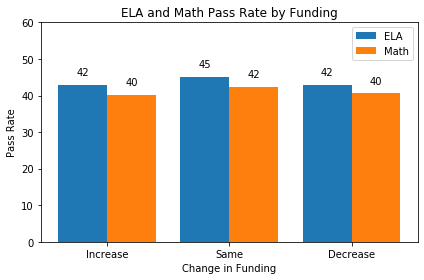

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot math and ELA 

labels = ['Increase', 'Same', 'Decrease']
ela_incr_means = [ela_funding_incr_mean, 
              ela_funding_same_mean, 
              ela_funding_decr_mean]

math_incr_means = [math_funding_incr_mean, 
              math_funding_same_mean, 
              math_funding_decr_mean]

x = np.arange(len(labels))  # the label locations
width = .4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, ela_incr_means, width, label='ELA')
rects2 = ax.bar(x+width/2, math_incr_means, width, label='Math')

ax.set_xlabel('Change in Funding')
ax.set_ylabel('Pass Rate')
ax.set_title('ELA and Math Pass Rate by Funding')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 60)
fig.tight_layout()

# label the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.show()

plt.savefig('change_in_funding.png')

### Statistical Tests: Number of Funding Sources

We compared the ELA state test scores of schools with between 0 and 7 self-reported outside funding sources. We compared the ELA scores of schools with 0-2 outside funders(*N* = 2149, *M* = 42.73), 3-5 funders (*N* = 670, *M* = 48.36), 6-7 outside funders (*N* = 43, *M* = 53.40). A one-way ANOVA indicated a statistically significant difference between funding types, *F* = 4.20, *p* = .02. Further, when the one-way ANOVA was performed with each funding level left separate (all eight levels), the results were also statistically significant. These results were not statistically signficant for math (*F* = 2.97, *p* < .001) but we did see the same trend.

In [119]:
# create bins and run a one-way ANOVA

ela_few_funders = ela_pass_rate_df[(ela_pass_rate_df['Q1_funding_sources'] == 0) | 
                                   (ela_pass_rate_df['Q1_funding_sources'] == 1) |
                                   (ela_pass_rate_df['Q1_funding_sources'] == 2)]
ela_mod_funders = ela_pass_rate_df[(ela_pass_rate_df['Q1_funding_sources'] == 3) | 
                                   (ela_pass_rate_df['Q1_funding_sources'] == 4) |
                                   (ela_pass_rate_df['Q1_funding_sources'] == 5)]
ela_many_funders = ela_pass_rate_df[(ela_pass_rate_df['Q1_funding_sources'] == 6) | 
                                   (ela_pass_rate_df['Q1_funding_sources'] == 7)]
# ANOVA
stats.f_oneway(ela_few_funders['level_3_4_1'], 
               ela_mod_funders['level_3_4_1'], 
               ela_many_funders['level_3_4_1'])

F_onewayResult(statistic=25.434753945444566, pvalue=1.1047872817150856e-11)

In [120]:
print(ela_few_funders['level_3_4_1'].mean())
print(ela_mod_funders['level_3_4_1'].mean())
print(ela_many_funders['level_3_4_1'].mean())
print(len(ela_few_funders['level_3_4_1'].unique()))
print(len(ela_mod_funders['level_3_4_1'].unique()))
print(len(ela_many_funders['level_3_4_1'].unique()))

42.72995126154726
48.35687276143729
53.40244792255814
2149
670
43


In [121]:
# create bins and run a one-way ANOVA

math_few_funders = math_pass_rate_df[(math_pass_rate_df['Q1_funding_sources'] == 0) | 
                                   (math_pass_rate_df['Q1_funding_sources'] == 1) |
                                   (math_pass_rate_df['Q1_funding_sources'] == 2)]
math_mod_funders = math_pass_rate_df[(math_pass_rate_df['Q1_funding_sources'] == 3) | 
                                   (math_pass_rate_df['Q1_funding_sources'] == 4) |
                                   (math_pass_rate_df['Q1_funding_sources'] == 5)]
math_many_funders = math_pass_rate_df[(math_pass_rate_df['Q1_funding_sources'] == 6) | 
                                   (math_pass_rate_df['Q1_funding_sources'] == 7)]
# ANOVA
stats.f_oneway(math_few_funders['level_3_4_1'], 
               math_mod_funders['level_3_4_1'], 
               math_many_funders['level_3_4_1'])

F_onewayResult(statistic=28.184371816920198, pvalue=7.403341089330552e-13)

In [122]:
print(math_few_funders['level_3_4_1'].mean())
print(math_mod_funders['level_3_4_1'].mean())
print(math_many_funders['level_3_4_1'].mean())
print(len(math_few_funders['level_3_4_1'].unique()))
print(len(math_mod_funders['level_3_4_1'].unique()))
print(len(math_many_funders['level_3_4_1'].unique()))

39.88607492749651
46.686012955107834
51.92440228165116
2174
673
43


In [123]:
# what is the mean pass rate for those with 1-7 funding sources
print(ela_pass_rate_df.groupby(['Q1_funding_sources']).mean()['level_3_4_1'])

# what is the distribution of schools at each level of funding?
print(ela_pass_rate_df.groupby(['Q1_funding_sources']).count()['level_3_4_1'])

Q1_funding_sources
0    37.000910
1    44.022331
2    45.734348
3    48.162791
4    49.044045
5    47.601830
6    54.212154
7    51.310708
Name: level_3_4_1, dtype: float64
Q1_funding_sources
0    626
1    985
2    770
3    440
4    188
5     58
6     31
7     12
Name: level_3_4_1, dtype: int64


In [124]:
# we get the same result when we don't use buckets

ela_zero_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 0]
ela_one_funder = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 1]
ela_two_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 2]
ela_three_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 3]
ela_four_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 4]
ela_five_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 5]
ela_six_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 6]
ela_seven_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 7]


# ANOVA
stats.f_oneway(ela_zero_funders['level_3_4_1'],
               ela_one_funder['level_3_4_1'], 
               ela_two_funders['level_3_4_1'], 
               ela_three_funders['level_3_4_1'],
               ela_four_funders['level_3_4_1'],
               ela_five_funders['level_3_4_1'],
               ela_six_funders['level_3_4_1'],
               ela_seven_funders['level_3_4_1'])

F_onewayResult(statistic=18.003183370829085, pvalue=1.3431090500717878e-23)

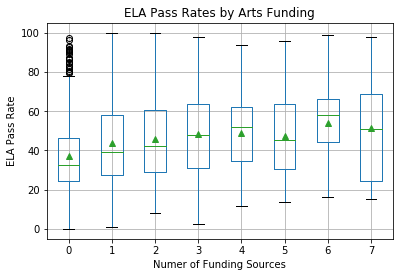

<Figure size 432x288 with 0 Axes>

In [125]:
ela_funders = ela_zero_funders.append(
               [ela_one_funder,
                ela_two_funders, 
               ela_three_funders,
               ela_four_funders,
               ela_five_funders,
               ela_six_funders,
               ela_seven_funders])

ela_funders.boxplot('level_3_4_1', by = 'Q1_funding_sources', meanline = False, showmeans = True)
plt.suptitle('')
plt.title('ELA Pass Rates by Arts Funding')
plt.xlabel('Numer of Funding Sources')
plt.ylabel('ELA Pass Rate')
plt.show()

plt.savefig('ela_boxplot.png')

In [126]:
# what is the mean pass rate for those with 1-7 funding sources
print(math_pass_rate_df.groupby(['Q1_funding_sources']).mean()['level_3_4_1'])

# what is the distribution of schools at each level of funding?
print(math_pass_rate_df.groupby(['Q1_funding_sources']).count()['level_3_4_1'])

Q1_funding_sources
0    33.170799
1    41.548729
2    43.209884
3    46.349134
4    48.021127
5    44.914034
6    52.344491
7    50.839173
Name: level_3_4_1, dtype: float64
Q1_funding_sources
0    625
1    985
2    770
3    440
4    188
5     58
6     31
7     12
Name: level_3_4_1, dtype: int64


In [127]:
# treat these levels as categorical and run a one-way ANOVA

math_zero_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 0]
math_one_funder = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 1]
math_two_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 2]
math_three_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 3]
math_four_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 4]
math_five_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 5]
math_six_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 6]
math_seven_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 7]


# ANOVA
stats.f_oneway(math_zero_funders['level_3_4_1'],
               math_one_funder['level_3_4_1'], 
               math_two_funders['level_3_4_1'], 
               math_three_funders['level_3_4_1'],
               math_four_funders['level_3_4_1'],
               math_five_funders['level_3_4_1'],
               math_six_funders['level_3_4_1'],
               math_seven_funders['level_3_4_1'])

F_onewayResult(statistic=19.493506600366466, pvalue=1.087502142474371e-25)

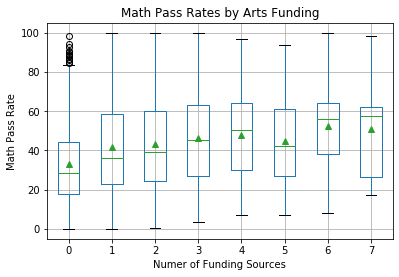

<Figure size 432x288 with 0 Axes>

In [128]:
math_funders = math_zero_funders.append(
               [math_one_funder,
               math_two_funders, 
               math_three_funders,
               math_four_funders,
               math_five_funders,
               math_six_funders,
               math_seven_funders])

math_funders.boxplot('level_3_4_1', by = 'Q1_funding_sources', meanline = False, showmeans = True)
plt.suptitle('')
plt.title('Math Pass Rates by Arts Funding')
plt.xlabel('Numer of Funding Sources')
plt.ylabel('Math Pass Rate')
plt.show()

plt.savefig('math_boxplot.png')

### Conclusions, Limitations, and Future Directions

Conclusions: 
* Funding category: The more arts funding a school reported, the better the math and ELA scores were. 
* Changes in Funding: Schools also performed better when they reported that their funding remained consistent. 
* Number of Funding Sources: Finally, schools with 3 or more funders tended to perform better in both math and ELA than schools with fewer funders.

Limitaions:
* Used only part of the dataset and were limited to years with data dictionaries
* Self-report questionnaire
* Categorical/ordinal variables, with nothing continuous like total funding
* State tests are point values that may not represent student performance or school quality

Future Directions:
* Break down the funding types (is one more predictive than the others?)
* Examine performance at the grade level